In [17]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from net import ResNet
from torchvision import transforms

## 查看pytorch版本信息

In [18]:
print("pytorch version:", torch.__version__)
print("device:", "cuda:0" if torch.cuda.is_available() else "cpu")

pytorch version: 1.11.0
device: cuda:0


In [19]:
# decorator wrapper
def counter(func):
    def wrapper(*args, **kw):
        start = time.perf_counter()
        print("[called {}] start".format(func.__name__))
        func(*args, **kw)
        end = time.perf_counter()
        print("[called {}] end time:{:.3}s".format(func.__name__, end - start))

    return wrapper

## 初始化配置信息

In [20]:
IMG_PATH = "./dataset/Testing/早疫病/Early_Blight_3.jpg"
MODEL_PATH = r"./models/linear_model_27__99.2.pth"

## 预览图片

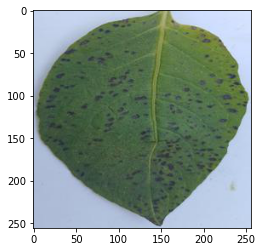

In [21]:
img = Image.open(IMG_PATH)
plt.subplot()
plt.imshow(img)

## 图像归一化

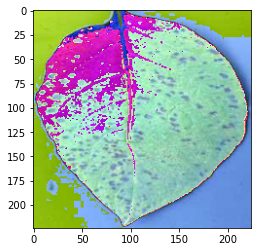

In [22]:
trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.5, 0.5, 0.5))
])

plt.subplot()
plt.imshow(transforms.Compose([
    trans,
    transforms.ToPILImage()
])(img))

## 载入模型

In [23]:
net = torch.load(MODEL_PATH, map_location=torch.device("cpu"))


## 结果预测

In [24]:
import time
from classify_label import index_to_label

img = trans(img)
# print(img.shape)
img = torch.reshape(img, (1, 3, 224, 224))


@counter
def predict(im):
    net.eval()
    with torch.no_grad():
        output = net(im)
        conf, predicted = torch.max(torch.softmax(output, dim=1), dim=1)
        print("预测值:{},可信度:{:.5}".format(index_to_label[predicted.item()], conf.item()))


predict(img)

[called predict] start
预测值:早疫病,可信度:0.99982
[called predict] end time:0.126s
